# Praca domowa 6

## Zadanie 1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/MI2-Education/2023L-ExploratoryDataAnalysis/main/homeworks/hw6/house_data.csv")

1. Jaka jest średnia cena nieruchomości położonych nad wodą, których jakoś wykończenia jest równa lub większa od mediany jakości wykończenia?


In [ ]:
mediana_jakosci = df['grade'].median()
domy = df[(df['waterfront'] == 1) & (df['grade'] >= mediana_jakosci)]

srednia_cena = domy['price'].mean()
srednia_cena


1784151.7006802722

Odp: 1784151.7 dolarów ($)

2. Czy nieruchomości o 2 piętrach mają większą (w oparciu o wartości mediany) liczbę łazienek niż nieruchomości o 3 piętrach?


In [ ]:
dwa_pietra = df[df['floors'] == 2]
trzy_pietra = df[df['floors'] == 3]

mediana_liczby_lazienek_dwa_pietra = dwa_pietra['bathrooms'].median()
mediana_liczby_lazienek_trzy_pietra = trzy_pietra['bathrooms'].median()

mediana_liczby_lazienek_dwa_pietra > mediana_liczby_lazienek_trzy_pietra

False

Odp: NIE

3. Jak wygląda wartość kwartyla 0.25 oraz 0.75 jakości wykończenia nieruchomości położonych na północy biorąc pod uwagę czy ma ona widok na wodę czy nie ma?

In [ ]:
punkt_srodkowy = (df['lat'].max() + df['lat'].min())/2
nieruchomosci_na_polnocy = df[df['lat'] > punkt_srodkowy]

nieruchomosci_na_polnocy_z_widokiem = nieruchomosci_na_polnocy[nieruchomosci_na_polnocy['waterfront'] == 1]
nieruchomosci_na_polnocy_bez_widoku = nieruchomosci_na_polnocy[nieruchomosci_na_polnocy['waterfront'] == 0]

# Kwartyl 0.25:

# Z widokiem na wode: 
print(np.percentile(nieruchomosci_na_polnocy_z_widokiem['grade'], 25))

# Bez widoku na wode:
print(np.percentile(nieruchomosci_na_polnocy_bez_widoku['grade'], 25))

# Kwartyl 0.75:

# Z widokiem na wode: 
print(np.percentile(nieruchomosci_na_polnocy_z_widokiem['grade'], 75))

# Bez widoku na wode:
print(np.percentile(nieruchomosci_na_polnocy_bez_widoku['grade'], 75))


8.0
7.0
10.0
8.0


Odp: 
#Kwartyl 0.25:

Z widokiem na wode: 8.0

Bez widoku na wode: 7.0

#Kwartyl 0.75:

Z widokiem na wode: 10.0

Bez widoku na wode: 8.0


4. Pod którym kodem pocztowy jest położonych najwięcej nieruchomości i jaki jest rozstęp miedzykwartylowy dla ceny nieruchomości położonych pod tym adresem?

In [ ]:
zliczone_po_kodzie = df['zipcode'].value_counts()
najwiecej_nieruchomosci = zliczone_po_kodzie.idxmax()
domy_tam_gdzie_najwiecej = df[df['zipcode'] == najwiecej_nieruchomosci]
iqr = np.percentile(domy_tam_gdzie_najwiecej['price'], 75) - np.percentile(domy_tam_gdzie_najwiecej['price'], 25)
iqr

262875.0

Odp: Najwięcej pod kodem 98103.
IQR: 262875



```
# Sformatowano jako kod
```

5. Ile procent nieruchomości ma wyższą średnią powierzchnię 15 najbliższych sąsiadów względem swojej powierzchni?

In [ ]:
nieruchomosci_z_wiekszym_sasiadem = df[df['sqft_lot15'] > df['sqft_lot']]
liczba_wierszy_wiekszy = nieruchomosci_z_wiekszym_sasiadem.shape[0]
liczba_wierszy_ogolem = df.shape[0]

procent = 100*(liczba_wierszy_wiekszy/liczba_wierszy_ogolem)
procent

39.513255910794435

Odp: Około 39,5%

 6. O ile procent więcej jest nieruchomości leżcych na północy zachód niż  nieruchomości leżących na południowy wschód?

In [ ]:
punkt_srodkowy_lat = (df['lat'].max() + df['lat'].min())/2
punkt_srodkowy_long = (df['long'].max() + df['long'].min())/2

nieruchomosci_na_polnocny_zachod = df[(df['lat'] > punkt_srodkowy_lat) & (df['long'] < punkt_srodkowy_long)]
nieruchomosci_na_poludniowy_wschod = df[(df['lat'] < punkt_srodkowy_lat) & (df['long'] > punkt_srodkowy_long)]

liczba_nieruchomosci_na_polnocny_zachod = nieruchomosci_na_polnocny_zachod.shape[0]
liczba_nieruchomosci_na_poludniowy_wschod = nieruchomosci_na_poludniowy_wschod.shape[0]

procent = 100*(liczba_nieruchomosci_na_polnocny_zachod - liczba_nieruchomosci_na_poludniowy_wschod)/(liczba_nieruchomosci_na_poludniowy_wschod)
procent

18343.529411764706

Odp: O około 18343,5%

# Zadanie 2

Dla wybranej zmiennej ze zbioru danych z Zadania 1 narysuj:

a) rozkład zmiennej jakościowej

b) rozkład zmiennej ilościowej

c) rozkład dwóch zmiennych (dowolna kombinacja jakościowej i ilościowej)

a)

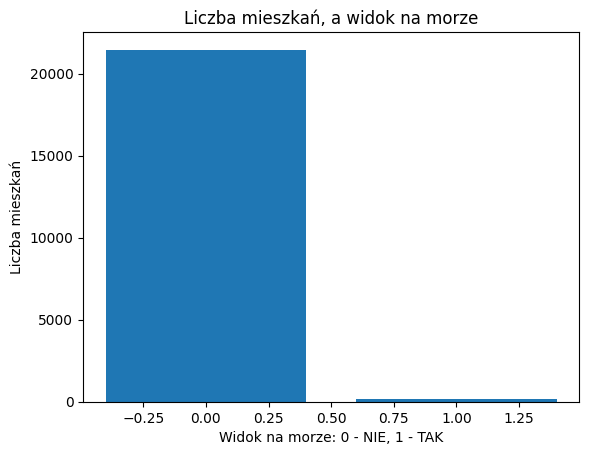

In [ ]:
counts = df['waterfront'].value_counts()
counts
plt.bar(counts.index, counts.values)
plt.xlabel('Widok na morze: 0 - NIE, 1 - TAK')
plt.ylabel('Liczba mieszkań')
plt.title('Liczba mieszkań, a widok na morze')
plt.show()

b)

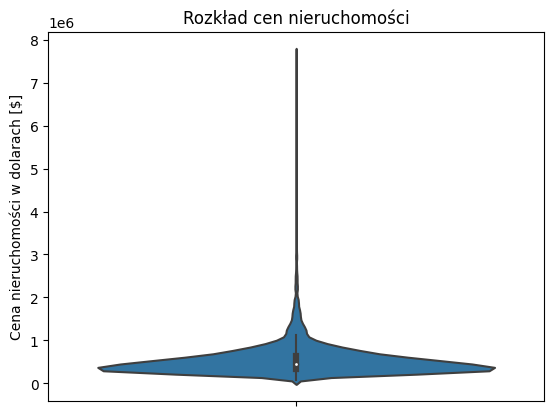

In [ ]:
sns.violinplot(data = df, y = 'price')
plt.ylabel('Cena nieruchomości w dolarach [$]')
plt.title('Rozkład cen nieruchomości')
plt.show()

c)